# Content Header

#### #1 Import libraries.

#### #2 Clean data by looking for extreme values.

#### #3 Explore data visually looking for variables to test.

#### #4 State hypothesis in a markdown cell.

#### #5 Rehsape the variables into NumPy arrays.

#### #6 Split the data into two set.

#### #7 Run a lineaar regression on the data.

#### #8 Create a plot that shows the regrssion line on the test set.

#### #9 Interpret how well the line appears to fit the data.

#### #10 Check the model performance statistics.

#### #11 Compare the predicted y values with the actual y values in a dataframe.

#### #12 Include thoughts on model performance.



# #1 Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:/Users/13019/Documents/Emmanuel/Data Analysis/Data Immersion/6.x/6.4'

In [4]:
df = pd.read_csv(os.path.join(path, 'Provisional_COVID-19_Deaths_by_Sex_and_Age_6_4_Filtered.csv'))

# #2 Cleaning data by looking for extreme values.

In [5]:
df.head() 

,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,2020,2,Alabama,All Sexes,Under 1 year,0,40,0,0,0,25
1,2020,3,Alabama,All Sexes,Under 1 year,0,24,18,0,0,25
2,2020,6,Alabama,All Sexes,Under 1 year,0,36,0,0,0,25
3,2020,9,Alabama,All Sexes,Under 1 year,0,32,18,0,0,25
4,2020,10,Alabama,All Sexes,Under 1 year,0,38,18,0,0,25


C:\Users\13019\AppData\Local\Temp\ipykernel_23904\750169707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pneumonia, Influenza, or COVID-19 Deaths'], bins=25) # Shows extreme values


<Axes: xlabel='Pneumonia, Influenza, or COVID-19 Deaths', ylabel='Density'>

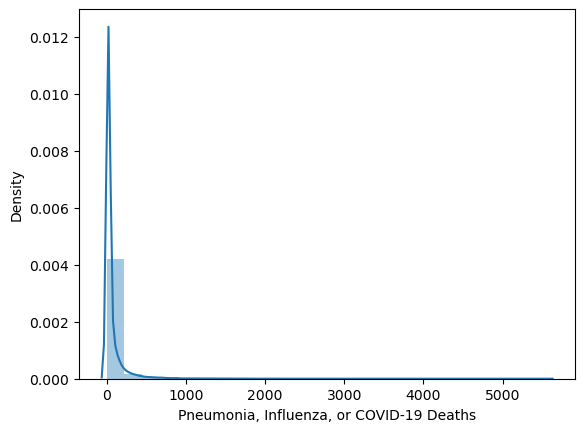

In [7]:
sns.distplot(df['Pneumonia, Influenza, or COVID-19 Deaths'], bins=25) # Shows extreme values

# #3 Exploring data visually with scatterplots to find vairables to test

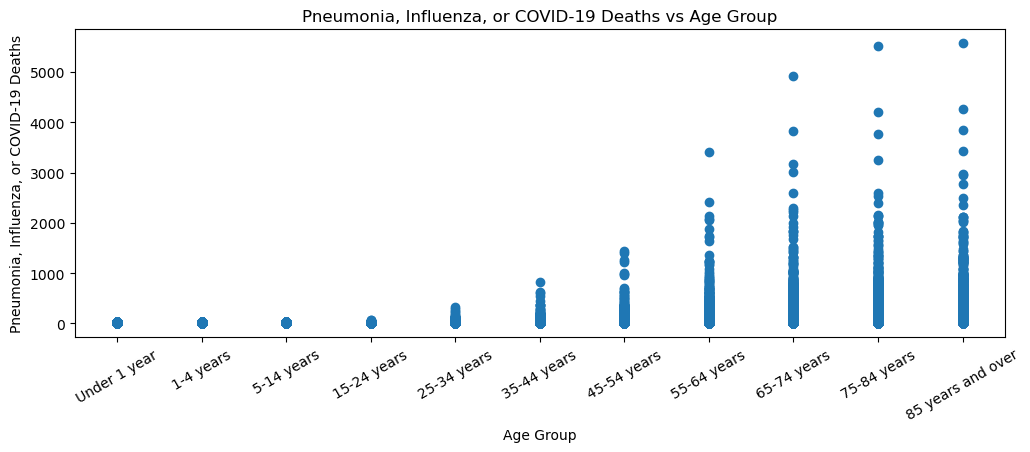

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

x = df['Age Group']
y = df['Pneumonia, Influenza, or COVID-19 Deaths']
# df.plot(x = 'Age Group', y='Pneumonia, Influenza, or COVID-19 Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.

plt.figure(figsize=(12,4))
plt.scatter(x,y)
plt.title('Pneumonia, Influenza, or COVID-19 Deaths vs Age Group')  
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('Age Group')  
plt.ylabel('Pneumonia, Influenza, or COVID-19 Deaths')  
plt.show()

In [68]:
df_scatterplot = df[['Total Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths']]
df_scatterplot.head()

,Total Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,40,25
1,24,25
2,36,25
3,32,25
4,38,25


 I decided I needed to use a plot that had two numerical values so that I could do the linear regression


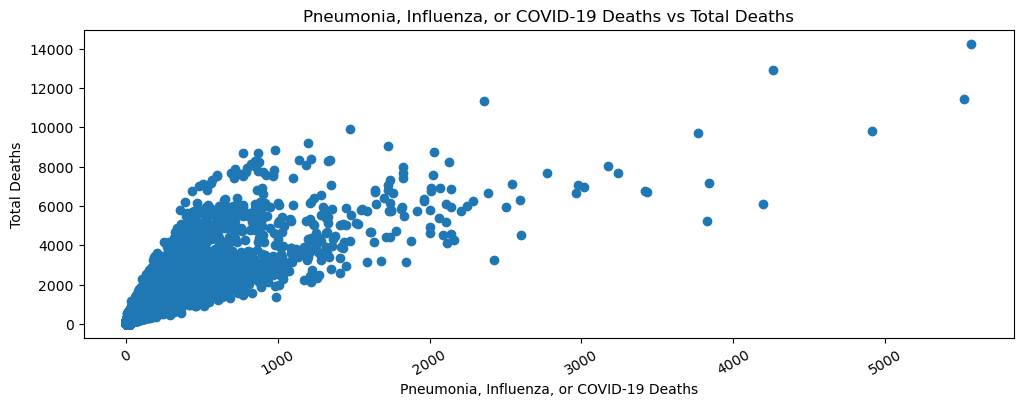

In [95]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

y = df_scatterplot['Total Deaths']
x = df_scatterplot['Pneumonia, Influenza, or COVID-19 Deaths']
# df.plot(x = 'Age Group', y='Pneumonia, Influenza, or COVID-19 Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.

plt.figure(figsize=(12,4))
plt.scatter(x,y)
plt.title('Pneumonia, Influenza, or COVID-19 Deaths vs Total Deaths')  
plt.xticks(fontsize=10, rotation=30) 
plt.ylabel('Total Deaths')  
plt.xlabel('Pneumonia, Influenza, or COVID-19 Deaths')  
plt.show()

# #4 Stating Hypothesis

Null Hypothesis: Illness deaths will have no influence on total death counts.

Alternate Hypothesis: More illness deaths will result in more total death counts. 


In [6]:
df_scatterplot2 = df[['Total Deaths', 'COVID-19 Deaths']]
df_scatterplot2.head()

,Total Deaths,COVID-19 Deaths
0,40,0
1,24,0
2,36,0
3,32,0
4,38,0


### -- Doing extra  scatterplots to add to presentation for each illness --

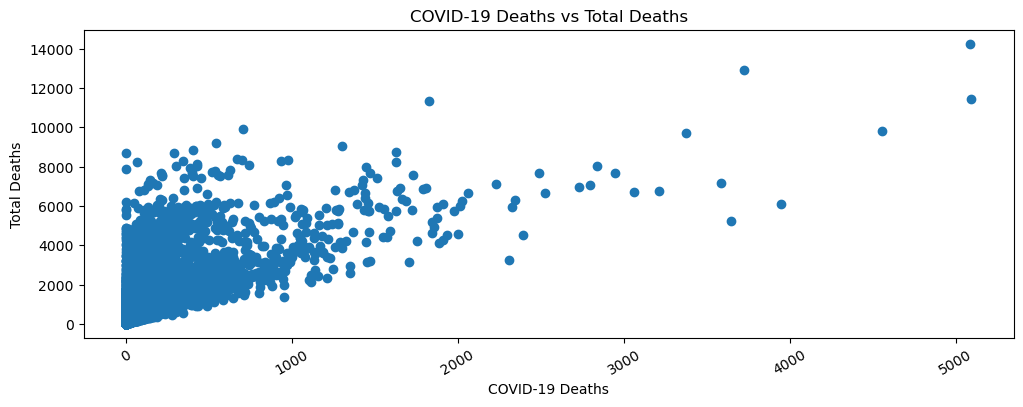

In [8]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

y = df_scatterplot2['Total Deaths']
x = df_scatterplot2['COVID-19 Deaths']
# df.plot(x = 'Age Group', y='Pneumonia, Influenza, or COVID-19 Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.

plt.figure(figsize=(12,4))
plt.scatter(x,y)
plt.title('COVID-19 Deaths vs Total Deaths')  
plt.xticks(fontsize=10, rotation=30) 
plt.ylabel('Total Deaths')  
plt.xlabel('COVID-19 Deaths')  
plt.show()

In [9]:
df_scatterplot3 = df[['Total Deaths', 'Pneumonia Deaths']]
df_scatterplot3.head()

,Total Deaths,Pneumonia Deaths
0,40,0
1,24,18
2,36,0
3,32,18
4,38,18


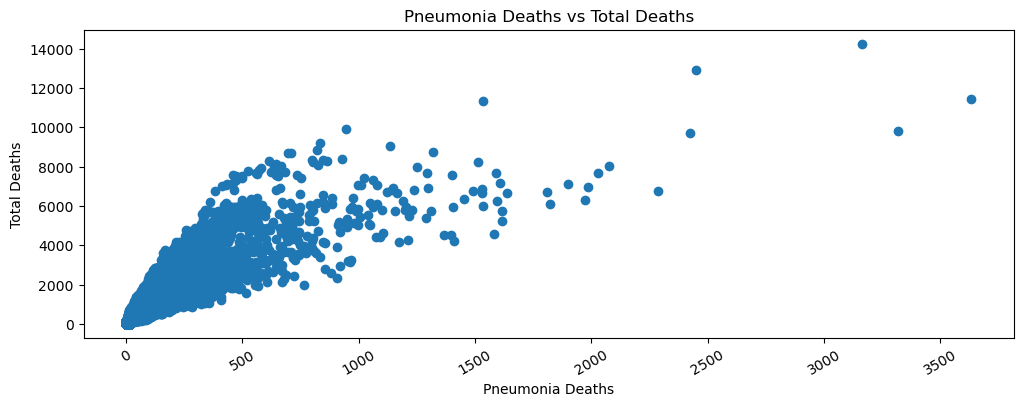

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

y = df_scatterplot3['Total Deaths']
x = df_scatterplot3['Pneumonia Deaths']
# df.plot(x = 'Age Group', y='Pneumonia, Influenza, or COVID-19 Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.

plt.figure(figsize=(12,4))
plt.scatter(x,y)
plt.title('Pneumonia Deaths vs Total Deaths')  
plt.xticks(fontsize=10, rotation=30) 
plt.ylabel('Total Deaths')  
plt.xlabel('Pneumonia Deaths')  
plt.show()

In [12]:
df_scatterplot4 = df[['Total Deaths', 'Influenza Deaths']]
df_scatterplot4.head()

,Total Deaths,Influenza Deaths
0,40,0
1,24,0
2,36,0
3,32,0
4,38,0


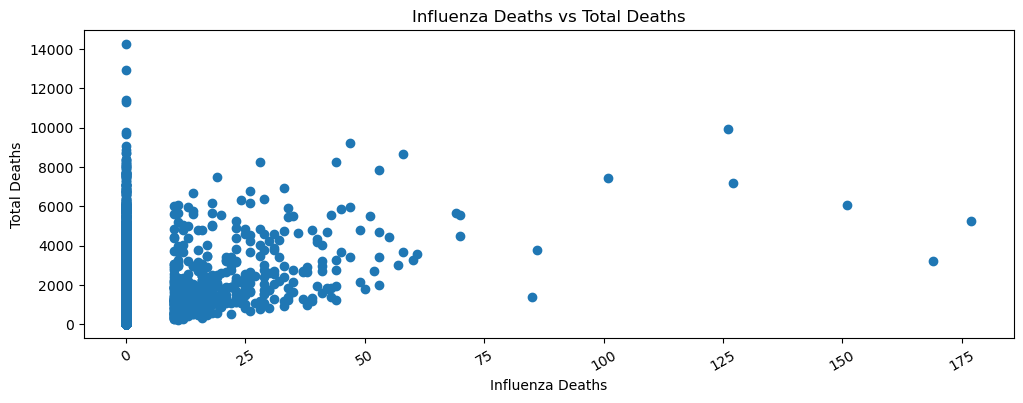

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

y = df_scatterplot4['Total Deaths']
x = df_scatterplot4['Influenza Deaths']
# df.plot(x = 'Age Group', y='Pneumonia, Influenza, or COVID-19 Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.

plt.figure(figsize=(12,4))
plt.scatter(x,y)
plt.title('Influenza Deaths vs Total Deaths')  
plt.xticks(fontsize=10, rotation=30) 
plt.ylabel('Total Deaths')  
plt.xlabel('Influenza Deaths')  
plt.show()

### -- Done --

# #5 Reshaping variables into Numpy arrays  

In [96]:
# Reshape the variables into NumPy arrays and put them into separate objects.
 
y = df_scatterplot['Total Deaths'].values.reshape(-1,1) 
X = df_scatterplot['Pneumonia, Influenza, or COVID-19 Deaths'].values.reshape(-1,1) 

In [79]:
X

array([[25],
       [25],
       [25],
       ...,
       [10],
       [ 0],
       [ 0]], dtype=int64)

In [80]:
y

array([[ 40],
       [ 24],
       [ 36],
       ...,
       [105],
       [ 61],
       [  0]], dtype=int64)

# #6 Splitting data

In [81]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# #7 Run a linear regression on the data

In [82]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [83]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [84]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

# #8 Creating a plot showing the regression line on the test set

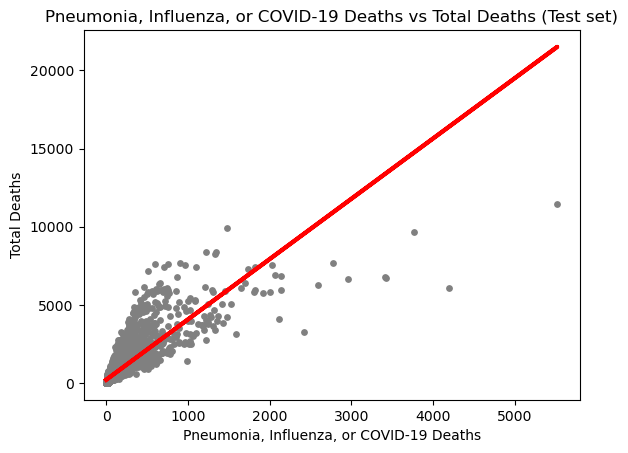

In [100]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Pneumonia, Influenza, or COVID-19 Deaths vs Total Deaths (Test set)')
plot_test.xlabel('Pneumonia, Influenza, or COVID-19 Deaths')
plot_test.ylabel('Total Deaths')
plot_test.show()

# #9 Interpret line fit

The line fits the data as best it can. The outliers make it difficult to fit.

In [86]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# #10 Checking the model performance statistics

In [87]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.86084523]]
Mean squared error:  289484.85947677924
R2 score:  0.6578381818228134


# #11 Comparing the predicted y values with the actual y values

In [88]:
y_predicted

array([[202.73875042],
       [897.69089124],
       [465.27622584],
       ...,
       [202.73875042],
       [299.25988109],
       [202.73875042]])

In [89]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,15,202.738750
1,1950,897.690891
2,545,465.276226
3,12,202.738750
4,960,1322.383866
5,28,202.738750
6,66,299.259881
7,1910,1438.209223
8,152,202.738750
9,152,202.738750


In [90]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [91]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [92]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.86084523]]
Mean squared error:  266755.9497676997
R2 score:  0.6724372692525855


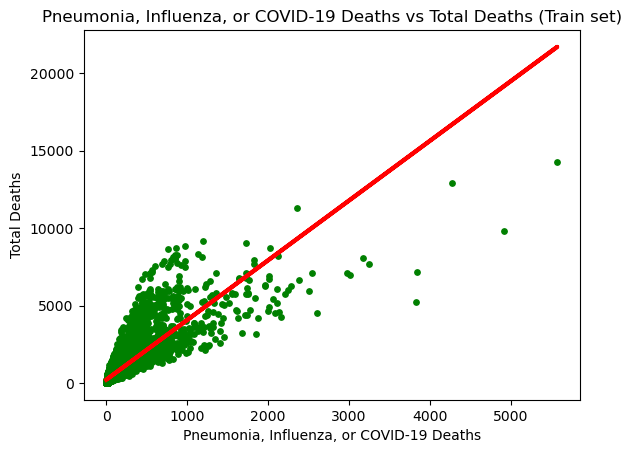

In [101]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Pneumonia, Influenza, or COVID-19 Deaths vs Total Deaths (Train set)')
plot_test.ylabel('Total Deaths')
plot_test.xlabel('Pneumonia, Influenza, or COVID-19 Deaths')
plot_test.show()

Given that most of the data points are clustered near zero, that seems to be where the line is getting most of its data from so it makes sense that farther out the points are a bit off. I'd say the line fits well. 

In [102]:
# Clean the extreme values from the "Pneumonia, Influenza, or COVID-19 Deaths" variable observed during the consistency checks.

df_scatterplot = df_scatterplot[df_scatterplot['Pneumonia, Influenza, or COVID-19 Deaths'] <=3000]

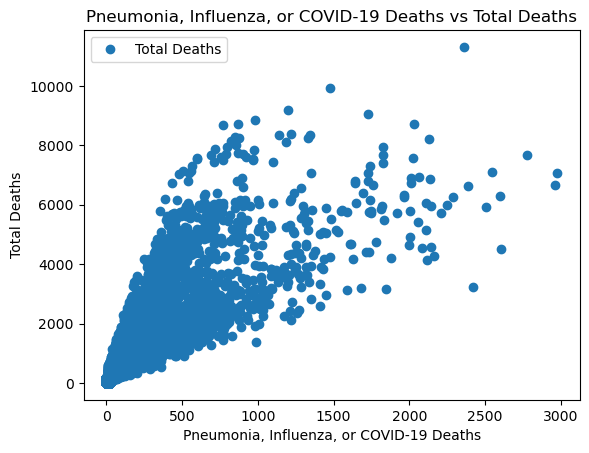

In [109]:
# See how the scatterplot looks without outliers.

df_scatterplot.plot(x = 'Pneumonia, Influenza, or COVID-19 Deaths', y='Total Deaths', style='o')  
plt.title('Pneumonia, Influenza, or COVID-19 Deaths vs Total Deaths')  
plt.xlabel('Pneumonia, Influenza, or COVID-19 Deaths')  
plt.ylabel('Total Deaths')  
plt.show()

In [104]:
# Reshape again.

X_2 = df_scatterplot['Pneumonia, Influenza, or COVID-19 Deaths'].values.reshape(-1,1)
y_2 = df_scatterplot['Total Deaths'].values.reshape(-1,1)

In [105]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [106]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [107]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [108]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.34637825]]
Mean squared error:  266755.9497676997
R2 score:  0.6724372692525855


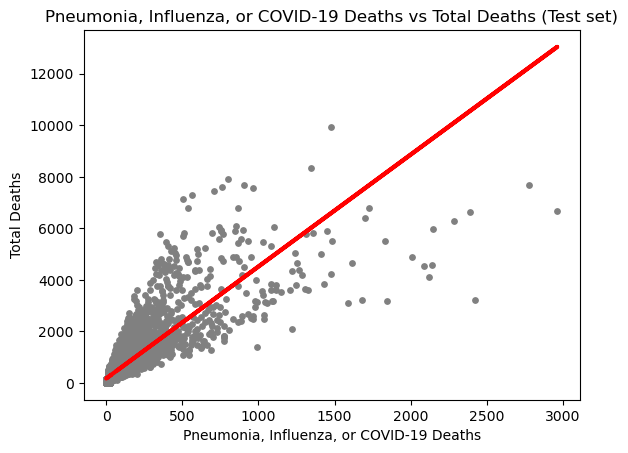

In [110]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Pneumonia, Influenza, or COVID-19 Deaths vs Total Deaths (Test set)')
plot_test.xlabel('Pneumonia, Influenza, or COVID-19 Deaths')
plot_test.ylabel('Total Deaths')
plot_test.show()

In [111]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,78,280.639579
1,177,232.829418
2,152,171.980123
3,147,280.639579
4,152,171.980123
5,439,302.371470
6,221,280.639579
7,1821,2175.660497
8,297,245.868553
9,13,171.980123


# #12 thoughts on how well the model performed on the test set



I would say it performed well given what it had. Since it probably had hundreds of points around zero and much fewer farther out, the line did the best it could to fit the closer and farther out data points. 